<a href="https://colab.research.google.com/github/annu-creator24t/Model_training-_EEG/blob/main/Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
# Mount Google Drive if files are stored there
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


      Patient_Type      SASI       HFD  ApproxEntropy  PermEntropy     Delta  \
0                0 -0.124008  2.090603       0.762534     0.751435  0.124910   
1                0 -0.204689  2.104400       0.716240     0.697230  0.070093   
2                0  0.737300  2.190070       0.938531     0.902844  0.212638   
3                0 -0.332389  2.098797       0.760937     0.716016  0.077182   
4                0  0.344217  2.093390       1.212368     0.903001  0.139420   
...            ...       ...       ...            ...          ...       ...   
1161             1 -0.556118  2.097508       0.961955     0.782740  0.067490   
1162             0 -0.052454  2.087944       1.295900     0.907216  0.017782   
1163             0  0.154296  2.098943       0.560951     0.706605  0.139532   
1164             1  0.355878  2.036192       0.365852     0.719154  0.214397   
1165             0 -0.724326  2.070790       0.414390     0.722713  0.193270   

         Theta     Alpha      Beta     

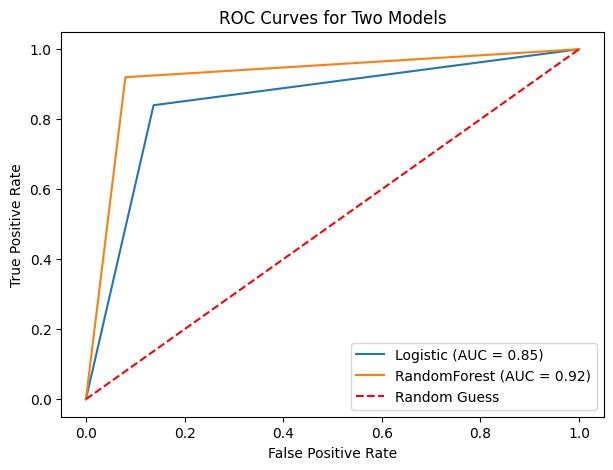

Model Accuracy: 92.00%
Confusion Matrix:
 [[161  14]
 [ 14 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       175
           1       0.92      0.92      0.92       175

    accuracy                           0.92       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.92      0.92      0.92       350



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


from sklearn.preprocessing import StandardScaler

# Load the dataset
csv_path = "/content/drive/MyDrive/Testing_Export_2_0.csv"
df = pd.read_csv(csv_path)

# Drop unnecessary columns (File and Channel since they are not useful for prediction)
df = df.drop(columns=["File", "Channel", "DFA"])
'''
# Handle missing values in DFA column
df["DFA"] = pd.to_numeric(df["DFA"], errors="coerce")  # Convert non-numeric values to NaN
df["DFA"].fillna(df["DFA"].median(), inplace=True)  # Replace NaNs with the median value
 '''
# Shuffle the dataset
df = df.sample(frac=1, random_state=82).reset_index(drop=True)
print(df)

# Define features (X) and target (y)
X = df.drop(columns=["Patient_Type"])  # Features
y = df["Patient_Type"]  # Target (0 = Healthy, 1 = Depressed)


# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000,penalty='l2',verbose=2,solver='liblinear')
model.fit(X_train, y_train)

#Train for random orest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred = model.predict(X_test)
print(y_pred)

test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred, 'RandomForest': y_pred_rf})

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
